In [1]:
import numpy as np
import cv2

In [12]:
my_faces = np.load('my_faces.npy')
unknown_faces = np.load('unknown_faces.npy')

In [13]:
import matplotlib.pyplot as plt

In [17]:
# plt.imshow(my_faces[10])
# plt.imshow(unknown_faces[100])

In [100]:
data = np.r_[my_faces.reshape(400,-1), unknown_faces.reshape(400,-1)]

In [101]:
data.shape

(800, 7500)

In [102]:
labels = np.zeros((data.shape[0],1))

In [103]:
labels[400:,:] = 1.0

In [104]:
np.unique(labels, return_counts=True)

(array([0., 1.]), array([400, 400], dtype=int64))

In [105]:
names = {
    0 : "Ravi",
    1 : "Unknown"
}

In [106]:
labels[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

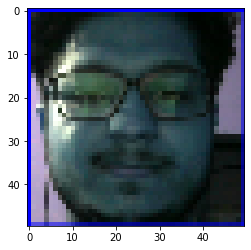

In [107]:
plt.imshow(data[8].reshape(50,50,3))

In [108]:
data = np.c_[data, labels]

In [109]:
data

array([[  0.,   0., 255., ...,   0., 255.,   0.],
       [  0.,   0., 255., ...,   0., 255.,   0.],
       [  0.,   0., 255., ...,   0., 255.,   0.],
       ...,
       [  0.,   0., 255., ...,   0., 255.,   1.],
       [  0.,   0., 255., ...,   0., 255.,   1.],
       [  0.,   0., 255., ...,   0., 255.,   1.]])

In [110]:
np.random.shuffle(data)

In [111]:
labels = data[:,-1]

In [133]:
np.unique(labels, return_counts=True)

(array([0., 1.]), array([400, 400], dtype=int64))

In [113]:
data

array([[  0.,   0., 255., ...,   0., 255.,   1.],
       [  0.,   0., 255., ...,  33., 228.,   0.],
       [  0.,   0., 255., ...,  15., 188.,   0.],
       ...,
       [  0.,   0., 255., ...,   9., 211.,   0.],
       [  0.,   0., 255., ...,   2., 238.,   0.],
       [  0.,   0., 255., ...,   0., 255.,   1.]])

In [121]:
# data[0].reshape(50,50,3)

In [123]:
cv2.imwrite('img1.png',data[0].reshape(50,50,3))

True

In [114]:
data = data[:,0:-1]

In [115]:
data

array([[  0.,   0., 255., ...,   0.,   0., 255.],
       [  0.,   0., 255., ...,  30.,  33., 228.],
       [  0.,   0., 255., ...,  11.,  15., 188.],
       ...,
       [  0.,   0., 255., ...,   7.,   9., 211.],
       [  0.,   0., 255., ...,   1.,   2., 238.],
       [  0.,   0., 255., ...,   0.,   0., 255.]])

In [124]:
# plt.imshow(data[400].reshape(50,50,3))
# data[0].reshape(50,50,3)

In [125]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2) ** 2))

In [138]:
def knn(data, target, k=11):
    dist = []
    for i in range(len(data)):
        dist.append(distance(data[i], target))
    #print(dist)
    sorted_index = np.argsort(dist)
    sorted_labels = labels[sorted_index][:k]
    print(sorted_labels)
    unique_labels = np.unique(sorted_labels, return_counts=True)
    #print(unique_labels)
    majority_element = np.argmax(unique_labels[1])
    return majority_element

In [139]:
haardata = cv2.CascadeClassifier('../data.xml')

# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('video_1.mp4')
faceData = []
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = cap.read()
    if flag:
        img = cv2.resize(img, None, fx=0.5, fy=0.5)
        faces = haardata.detectMultiScale(img,1.2)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 5)
            face = img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50,50))
            pred = knn(data, face.reshape(1,-1))
            name = names[int(pred)]
            #print(pred)
            cv2.putText(img, name, (x,y), font, 1, (0,255,0),1)
        cv2.imshow('img', img)
        if cv2.waitKey(1) == 27 or len(faceData) >= 400:
            break
    else:
        print("Camera is not detected...")
        break
cv2.destroyAllWindows()
cap.release()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1